### Simple Linear Regression From Scratch using Numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-10, 10, 100)
noise = np.random.normal(size=100) * 10
y = 4*x + 3 + noise

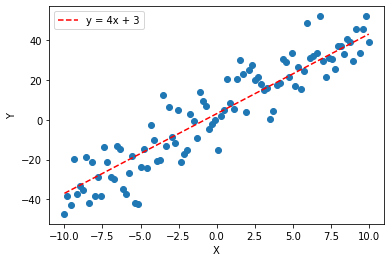

In [3]:
plt.scatter(x, y)
plt.plot(x, 4*x + 3, color="red", linestyle="--", label='y = 4x + 3')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

In [4]:
x = x.reshape([-1, 1])
y = y.reshape([-1, 1])

n_samples = x.shape[0]

split_ratio = .2

split_size = int( n_samples * (1-split_ratio) )

x_train, x_test, y_train, y_test = x[:split_size], x[split_size: ], y[:split_size], y[split_size: ]

In [5]:
n_iter = 1000
lr = .001

w = 0
b = 1

stop_factor = 1.0e-03
loss_last_values = [0, 0]

for epoch in range(n_iter+1):
    
    y_hat = w*x_train + b
    
    dw = (1/len(x_train)) * np.dot( x_train.T, (y_hat - y_train) )
    db = np.mean(y_hat - y_train )
    
    w = w - lr*dw
    b = b - lr*db
    
    loss = 1/len(x_train) * np.dot( (y_hat - y_train).T, (y_hat - y_train) )
    loss_last_values[0] = loss_last_values[1]
    loss_last_values[1] = loss
    loss_diff = abs(loss_last_values[0] - loss_last_values[1])[0][0]
        
    if epoch % 100 == 0:
        print(f'epoch #{epoch}\n\t loss = {loss[0][0]:.5f}, RMSE = {np.sqrt(loss[0][0]):.5f}\n\t\
        dw ={dw[0][0]:.5f}, db ={db:.5f}\n\t\t w = {w[0][0]:.5f}, b = {b:.5f}\
         {loss_diff:.5f} {stop_factor}')
     
    
    if loss_diff <= stop_factor:
        print(f'epoch #{epoch}\n\t loss = {loss[0][0]:.5f}, RMSE = {np.sqrt(loss[0][0]):.5f}\n\t\
        dw ={dw[0][0]:.5f}, db ={db:.5f}\n\t\t w = {w[0][0]:.5f}, b = {b:.5f}\
         {loss_diff:.5f} {stop_factor}')
        break

epoch #0
	 loss = 562.44143, RMSE = 23.71585
	        dw =-107.89907, db =5.92242
		 w = 0.10790, b = 0.99408         562.44143 0.001
epoch #100
	 loss = 114.62105, RMSE = 10.70612
	        dw =-7.92728, db =-1.92930
		 w = 3.87272, b = 0.95786         0.13799 0.001
epoch #200
	 loss = 111.11710, RMSE = 10.54121
	        dw =-0.74333, db =-2.30329
		 w = 4.16091, b = 1.18098         0.01175 0.001
epoch #300
	 loss = 110.08298, RMSE = 10.49204
	        dw =-0.21415, db =-2.15624
		 w = 4.19835, b = 1.40458         0.00940 0.001
epoch #400
	 loss = 109.21820, RMSE = 10.45075
	        dw =-0.16329, db =-1.98580
		 w = 4.21646, b = 1.61153         0.00795 0.001
epoch #500
	 loss = 108.48679, RMSE = 10.41570
	        dw =-0.14776, db =-1.82652
		 w = 4.23194, b = 1.80196         0.00672 0.001
epoch #600
	 loss = 107.86814, RMSE = 10.38596
	        dw =-0.13572, db =-1.67986
		 w = 4.24610, b = 1.97711         0.00569 0.001
epoch #700
	 loss = 107.34486, RMSE = 10.36074
	        dw =-0.12481

In [6]:
w[0][0]

4.2922071278516265

In [7]:
b

2.5478789634071823

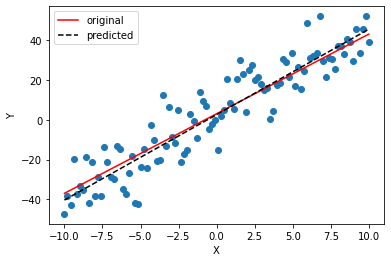

In [8]:
plt.scatter(x, y)
plt.plot(x, (4*x + 3), color="red", label='original')

y_p = w*x + b
plt.plot(x, y_p, color="black", linestyle="--", label='predicted')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()